In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

It is clearly visible that the dataset is imbalanced

In [7]:
feature_col=df.drop(["Class",],axis=1).columns
feature_col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

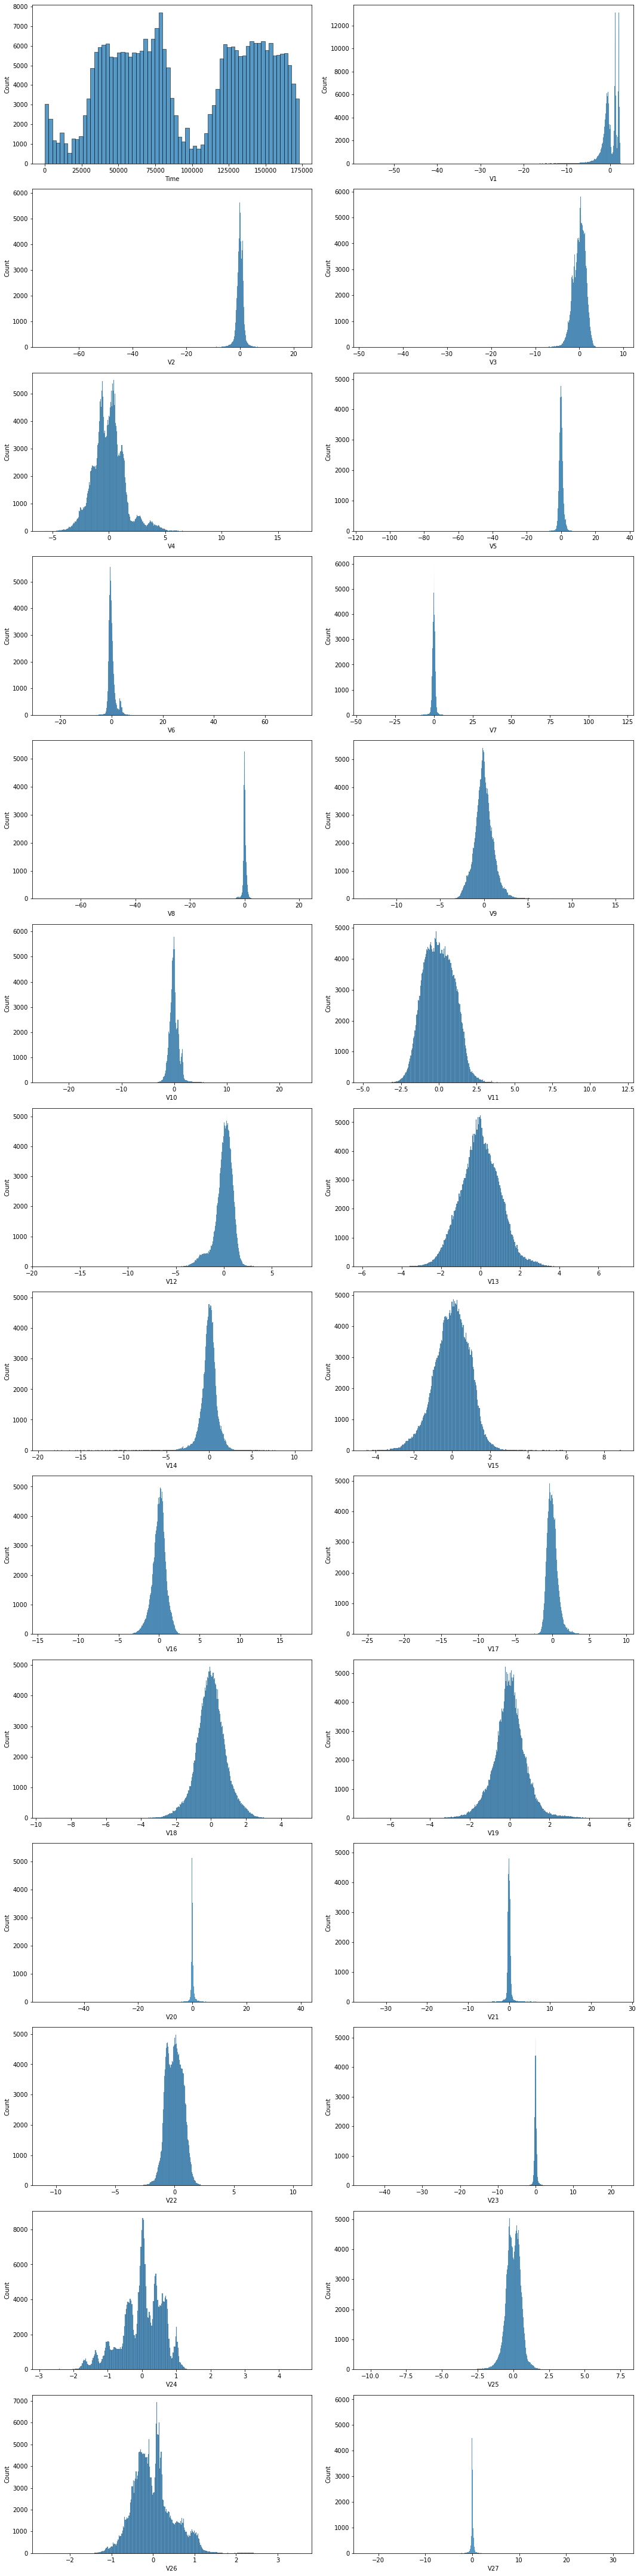

In [8]:
# HISTOGRAM
fig, ax=plt.subplots(ncols=2,nrows=14,figsize=(15,2*len(feature_col)))
for i,c in zip(ax.flatten(),feature_col):
    sns.histplot(df[c],ax=i)
fig.tight_layout()

In [9]:
corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<AxesSubplot:>

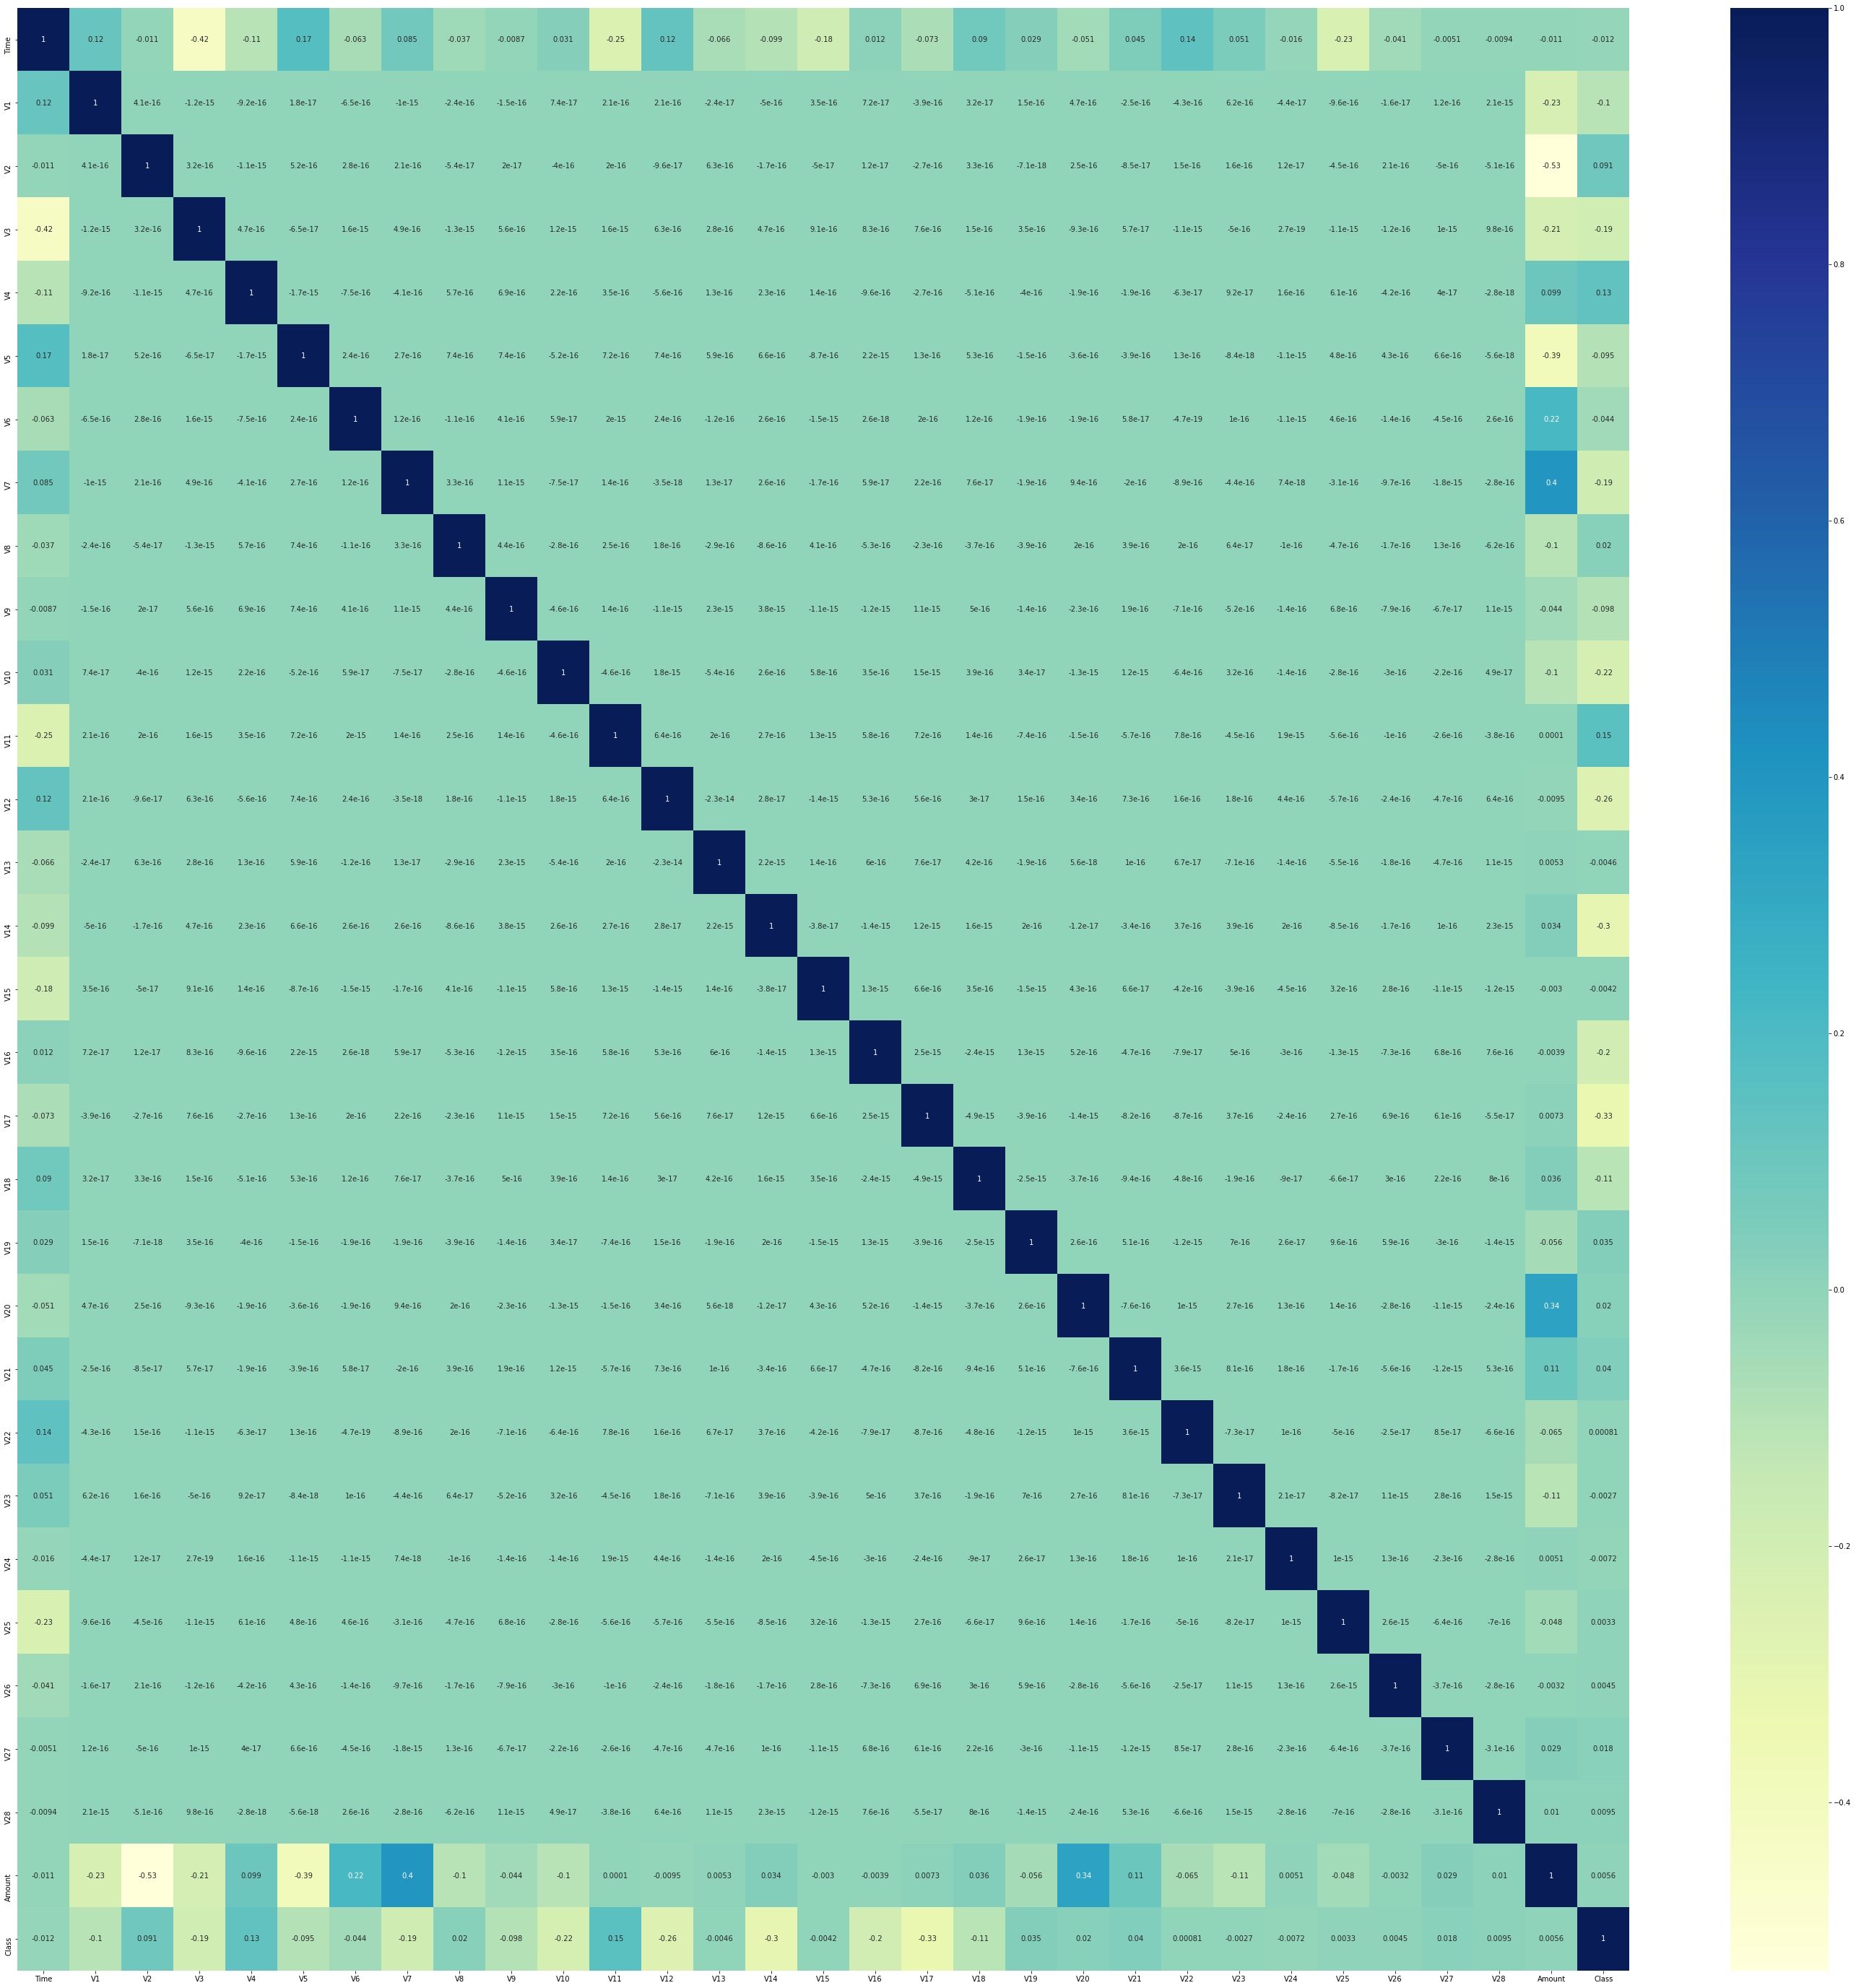

In [10]:
plt.figure(figsize= (50,50))
sns.heatmap(data = df.corr(),annot = True, cmap="YlGnBu")

In [11]:
corr["Class"]

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [12]:
x=df.corrwith(df["Class"]).to_dict()
features=[]
for k,v in x.items():
    if abs(v)>0.1:
        print(f"{k} :{v: 0.2f}")
        features.append(k)

V1 :-0.10
V3 :-0.19
V4 : 0.13
V7 :-0.19
V10 :-0.22
V11 : 0.15
V12 :-0.26
V14 :-0.30
V16 :-0.20
V17 :-0.33
V18 :-0.11
Class : 1.00


In [13]:
X=df[features]
Y=df["Class"]

X
Y


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [14]:
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# The Dataset is imbalanced, so we have to balance the dataset

In [15]:
df_0=df[df.Class==0]

In [16]:
df_0

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
df_1=df[df.Class==1]

In [18]:
df_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [19]:
# Building an ANN model

In [20]:
# Building an ann model
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [21]:
def ANN(X_train,Y_train,X_test,Y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_dim=11,activation="relu"),
        keras.layers.Dense(20,activation="relu"),
        keras.layers.Dense(10,activation="relu"),
        keras.layers.Dense(1,activation="sigmoid")
    ])
    model.compile(optimizer="adam",loss=loss,metrics=["accuracy"])
    if weights==-1:
        model.fit(X_train,Y_train,epochs=100)
    else:
        model.fit(X_train,Y_train,epochs=100,class_weight=weights)
    print(model.evaluate(X_test,Y_test))
    Y_preds=model.predict(X_test)
    Y_preds=np.round(Y_preds)
    
    print("Classification Report:  \n",classification_report(Y_test,Y_preds))
    return Y_preds

# Undersampling

In [22]:
#WE will undersample the ) class and concad the both dataframes
count_class_1=df_1["Class"].value_counts()
count_class_1

1    492
Name: Class, dtype: int64

In [23]:
df_Class_0_undersampling=df_0.sample(492)
df_Class_0_undersampling

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
272516,165130.0,-0.177637,-0.621113,-0.832523,-3.971789,2.179976,3.529133,-0.266786,0.631153,-1.766084,...,-0.011048,0.687277,-0.313562,0.729896,0.062189,-0.036584,0.115938,-0.007087,10.00,0
242043,151311.0,-0.797674,-1.328819,1.820065,0.656837,0.588505,0.348049,-1.522078,0.747151,1.919305,...,0.457727,1.472787,0.310372,-0.428187,-1.669870,-0.865343,0.420455,0.366447,1.00,0
100865,67649.0,-1.087124,0.356939,2.520573,0.145459,0.428279,-0.619265,0.557117,-0.028483,-0.512415,...,0.145946,0.299831,-0.229543,0.510518,0.429501,-0.505431,-0.140029,-0.149294,29.65,0
150517,93591.0,-0.434476,1.184536,0.073065,0.315579,-0.472076,1.135973,-2.327034,-4.632927,2.449366,...,4.735720,-0.670473,0.245089,-0.552339,-0.346095,-0.145342,0.551032,0.399567,14.95,0
233904,147747.0,-3.226248,-4.185371,2.846206,2.190220,21.120137,-14.352986,-23.386192,-0.073603,2.898908,...,0.861730,-5.513446,-36.666000,1.348055,-6.712624,0.229669,1.789949,1.279816,12.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176105,122628.0,2.012382,0.189844,-1.401812,1.124613,0.534375,-0.541679,0.323160,-0.294701,0.080038,...,0.270216,0.899117,-0.006669,0.638329,0.369042,-0.454763,0.004337,-0.041419,20.00,0
137031,81988.0,0.942883,0.353067,0.671608,2.147001,0.668415,1.837514,-0.290516,0.632040,-1.050095,...,-0.071237,-0.173220,0.251591,-1.058023,-0.090554,-0.156453,0.061092,0.005493,9.91,0
101439,67835.0,1.013750,-1.827210,-0.153455,-1.104796,-1.601138,-0.660343,-0.516022,-0.182539,-1.972711,...,-0.019361,-0.169824,-0.303741,0.327633,0.529026,-0.104236,-0.039352,0.039820,258.93,0
213436,139256.0,1.028227,-2.907450,-1.447326,-0.925434,-0.637235,1.910527,-0.815926,0.449568,-0.119643,...,0.795644,1.166564,-0.304409,-0.888852,-0.540019,-0.039977,-0.045427,0.025997,540.00,0


In [24]:
df_test_undersampling=pd.concat([df_Class_0_undersampling,df_1],axis=0)
df_test_undersampling

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
272516,165130.0,-0.177637,-0.621113,-0.832523,-3.971789,2.179976,3.529133,-0.266786,0.631153,-1.766084,...,-0.011048,0.687277,-0.313562,0.729896,0.062189,-0.036584,0.115938,-0.007087,10.00,0
242043,151311.0,-0.797674,-1.328819,1.820065,0.656837,0.588505,0.348049,-1.522078,0.747151,1.919305,...,0.457727,1.472787,0.310372,-0.428187,-1.669870,-0.865343,0.420455,0.366447,1.00,0
100865,67649.0,-1.087124,0.356939,2.520573,0.145459,0.428279,-0.619265,0.557117,-0.028483,-0.512415,...,0.145946,0.299831,-0.229543,0.510518,0.429501,-0.505431,-0.140029,-0.149294,29.65,0
150517,93591.0,-0.434476,1.184536,0.073065,0.315579,-0.472076,1.135973,-2.327034,-4.632927,2.449366,...,4.735720,-0.670473,0.245089,-0.552339,-0.346095,-0.145342,0.551032,0.399567,14.95,0
233904,147747.0,-3.226248,-4.185371,2.846206,2.190220,21.120137,-14.352986,-23.386192,-0.073603,2.898908,...,0.861730,-5.513446,-36.666000,1.348055,-6.712624,0.229669,1.789949,1.279816,12.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [25]:
df_test_undersampling.shape

(984, 31)

In [26]:
df_test_undersampling_features=df_test_undersampling[features]
X=df_test_undersampling_features.iloc[ : , :11]
Y=df_test_undersampling["Class"]

In [27]:
X

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
272516,-0.177637,-0.832523,-3.971789,-0.266786,1.126309,-0.696226,-1.166063,-0.681390,-1.171951,0.356950,-0.306877
242043,-0.797674,1.820065,0.656837,-1.522078,-0.569730,-1.001980,0.849772,-0.964902,0.212714,-0.714565,0.932075
100865,-1.087124,2.520573,0.145459,0.557117,-0.345587,1.240883,0.317299,0.124186,0.590069,-1.025399,0.620868
150517,-0.434476,0.073065,0.315579,-2.327034,-0.095152,1.203919,-1.355928,1.778198,0.000537,0.521928,1.245106
233904,-3.226248,2.846206,2.190220,-23.386192,3.198512,1.153875,2.805315,-0.694023,-0.358613,3.235706,-0.775774
...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,-4.518331,1.749293,-0.882850,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,-1.315147
280143,1.378559,-5.004247,1.411850,-1.413170,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,-0.688505
280149,-0.676143,-2.213700,0.468308,-2.234739,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,-0.507000
281144,-3.113832,-5.399730,1.817092,-2.208002,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,-1.478138


In [28]:
Y

272516    0
242043    0
100865    0
150517    0
233904    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=15)

In [30]:
Y_train.value_counts()


1    394
0    393
Name: Class, dtype: int64

In [31]:
X_train.shape

(787, 11)

In [32]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
LogReg.fit(X_train,Y_train)
Y_prediction_LogReg=LogReg.predict(X_test)

In [33]:
classification_report(Y_test,Y_prediction_LogReg)

'              precision    recall  f1-score   support\n\n           0       0.87      0.99      0.92        99\n           1       0.99      0.85      0.91        98\n\n    accuracy                           0.92       197\n   macro avg       0.93      0.92      0.92       197\nweighted avg       0.93      0.92      0.92       197\n'

In [34]:
LogReg_accuracy=round(accuracy_score(Y_test,Y_prediction_LogReg)*100,5)
LogReg_accuracy

91.87817

In [35]:
from sklearn.svm import SVC
svc=SVC(kernel="sigmoid")
svc.fit(X_train,Y_train)
Y_prediction_svc=svc.predict(X_test)

In [36]:
confusion_matrix(Y_test,Y_prediction_svc)

array([[93,  6],
       [20, 78]], dtype=int64)

In [37]:
classification_report(Y_test,Y_prediction_svc)

'              precision    recall  f1-score   support\n\n           0       0.82      0.94      0.88        99\n           1       0.93      0.80      0.86        98\n\n    accuracy                           0.87       197\n   macro avg       0.88      0.87      0.87       197\nweighted avg       0.88      0.87      0.87       197\n'

In [38]:
svc_accuracy=round(accuracy_score(Y_test,Y_prediction_svc)*100,5)
svc_accuracy

86.80203

In [39]:
# !pip install tensorflow_addons

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,Y_train)
Y_predict_rfc=rfc.predict(X_test)

In [41]:
confusion_matrix(Y_test,Y_predict_rfc)

array([[96,  3],
       [14, 84]], dtype=int64)

In [42]:
classification_report(Y_test,Y_predict_rfc)

'              precision    recall  f1-score   support\n\n           0       0.87      0.97      0.92        99\n           1       0.97      0.86      0.91        98\n\n    accuracy                           0.91       197\n   macro avg       0.92      0.91      0.91       197\nweighted avg       0.92      0.91      0.91       197\n'

In [43]:
rfc_accuracy=round(accuracy_score(Y_test,Y_predict_rfc)*100,5)
rfc_accuracy

91.37056

In [44]:
from xgboost import XGBClassifier
xgb= XGBClassifier(n_jobs=-1)
xgb.fit(X_train,Y_train)
Y_predict_xgb= xgb.predict(X_test)

[02:41:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\manga\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [45]:
confusion_matrix(Y_test,Y_predict_xgb)

array([[97,  2],
       [12, 86]], dtype=int64)

In [46]:
classification_report(Y_test,Y_predict_xgb)

'              precision    recall  f1-score   support\n\n           0       0.89      0.98      0.93        99\n           1       0.98      0.88      0.92        98\n\n    accuracy                           0.93       197\n   macro avg       0.93      0.93      0.93       197\nweighted avg       0.93      0.93      0.93       197\n'

In [47]:
xgb_accuracy=round(accuracy_score(Y_test,Y_predict_xgb)*100,5)
xgb_accuracy

92.8934

In [48]:
Y_preds=ANN(X_train,Y_train,X_test,Y_test,"binary_crossentropy",-1)

Epoch 1/100
25/25 [==============================] - 0s 989us/step - loss: 0.8204 - accuracy: 0.4943
Epoch 2/100
25/25 [==============================] - 0s 919us/step - loss: 0.4900 - accuracy: 0.8208
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8920
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.9250
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2518 - accuracy: 0.9288
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2128 - accuracy: 0.9339
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9416
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9428
Epoch 9/100
25/25 [==============================] - 0s 947us/step - loss: 0.1533 - accuracy: 0.9466
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.9492
Epo

25/25 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9898
Epoch 83/100
25/25 [==============================] - 0s 855us/step - loss: 0.0423 - accuracy: 0.9835
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9886
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0387 - accuracy: 0.9898
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9886
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 0.9886
Epoch 88/100
25/25 [==============================] - 0s 474us/step - loss: 0.0350 - accuracy: 0.9911
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9911
Epoch 90/100
25/25 [==============================] - 0s 870us/step - loss: 0.0326 - accuracy: 0.9911
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9911
Epoch 9

In [49]:
ANN_accuracy=round(accuracy_score(Y_test,Y_preds)*100,5)
ANN_accuracy

92.38579

In [50]:
#REPORT

In [51]:
models=pd.DataFrame({"Model":["Logistic Regression","SVM","Random Forest","XGBoost Classifier","ANN"],
                    "Score":[LogReg_accuracy,svc_accuracy,rfc_accuracy,xgb_accuracy,ANN_accuracy]})

In [52]:
models.sort_values(by="Score",ascending=True)

,Model,Score
1,SVM,86.80203
2,Random Forest,91.37056
0,Logistic Regression,91.87817
4,ANN,92.38579
3,XGBoost Classifier,92.89340


# Oversampling

In [53]:
count_class_0=df_0.Class.value_counts()
count_class_0

0    284315
Name: Class, dtype: int64

In [54]:
df_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [55]:
df_Class_1_oversampling=df_1.sample(284315,replace=True)

In [56]:
df_test_oversampling=pd.concat([df_0,df_Class_1_oversampling],axis=0)

In [57]:
df_test_oversampling.shape

(568630, 31)

In [58]:
df_test_oversampling_features=df_test_oversampling[features]
X=df_test_oversampling_features.iloc[ : , :11]
Y=df_test_oversampling["Class"]

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=15)

In [60]:
Y_train.value_counts()


0    227523
1    227381
Name: Class, dtype: int64

In [61]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
LogReg.fit(X_train,Y_train)
Y_prediction_LogReg=LogReg.predict(X_test)

In [62]:
classification_report(Y_test,Y_prediction_LogReg)

'              precision    recall  f1-score   support\n\n           0       0.91      0.98      0.94     56792\n           1       0.98      0.90      0.94     56934\n\n    accuracy                           0.94    113726\n   macro avg       0.94      0.94      0.94    113726\nweighted avg       0.94      0.94      0.94    113726\n'

In [63]:
LogReg_accuracy=round(accuracy_score(Y_test,Y_prediction_LogReg)*100,5)
LogReg_accuracy

94.1148

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,Y_train)
Y_predict_rfc=rfc.predict(X_test)

In [65]:
confusion_matrix(Y_test,Y_predict_rfc)

array([[56785,     7],
       [    0, 56934]], dtype=int64)

In [66]:
classification_report(Y_test,Y_predict_rfc)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56792\n           1       1.00      1.00      1.00     56934\n\n    accuracy                           1.00    113726\n   macro avg       1.00      1.00      1.00    113726\nweighted avg       1.00      1.00      1.00    113726\n'

In [67]:
rfc_accuracy=round(accuracy_score(Y_test,Y_predict_rfc)*100,5)
rfc_accuracy

99.99384

In [68]:
from xgboost import XGBClassifier
xgb= XGBClassifier(n_jobs=-1)
xgb.fit(X_train,Y_train)
Y_predict_xgb= xgb.predict(X_test)

C:\Users\manga\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [69]:
confusion_matrix(Y_test,Y_predict_xgb)

array([[56772,    20],
       [    0, 56934]], dtype=int64)

In [70]:
classification_report(Y_test,Y_predict_xgb)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56792\n           1       1.00      1.00      1.00     56934\n\n    accuracy                           1.00    113726\n   macro avg       1.00      1.00      1.00    113726\nweighted avg       1.00      1.00      1.00    113726\n'

In [71]:
xgb_accuracy=round(accuracy_score(Y_test,Y_predict_xgb)*100,5)
xgb_accuracy

99.98241

In [72]:
Y_preds=ANN(X_train,Y_train,X_test,Y_test,"binary_crossentropy",-1)


Epoch 1/100
14216/14216 [==============================] - 20s 1ms/step - loss: 0.0499 - accuracy: 0.9828
Epoch 2/100
14216/14216 [==============================] - 20s 1ms/step - loss: 0.0158 - accuracy: 0.9962
Epoch 3/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0113 - accuracy: 0.9972
Epoch 4/100
14216/14216 [==============================] - 21s 1ms/step - loss: 0.0096 - accuracy: 0.9976
Epoch 5/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0083 - accuracy: 0.9980
Epoch 6/100
14216/14216 [==============================] - 20s 1ms/step - loss: 0.0075 - accuracy: 0.9981
Epoch 7/100
14216/14216 [==============================] - 20s 1ms/step - loss: 0.0071 - accuracy: 0.9983 0s - loss: 0.0071 - accura
Epoch 8/100
14216/14216 [==============================] - 21s 1ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 9/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0060 - accuracy: 0.9986
Epoch 10/100
14216/

14216/14216 [==============================] - 20s 1ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 77/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 78/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 79/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 80/100
14216/14216 [==============================] - 20s 1ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 81/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 82/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 83/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0021 - accuracy: 0.9996
Epoch 84/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 85/100
14216/14216 [========================

In [73]:
ANN_accuracy=round(accuracy_score(Y_test,Y_preds)*100,5)
ANN_accuracy

99.94285

In [74]:
#Report

In [75]:
models=pd.DataFrame({"Model":["Logistic Regression","Random Forest","XGBoost Classifier","ANN"],
                    "Score":[LogReg_accuracy,rfc_accuracy,xgb_accuracy,ANN_accuracy]})

In [76]:
models.sort_values(by="Score",ascending=True)

,Model,Score
0,Logistic Regression,94.11480
3,ANN,99.94285
2,XGBoost Classifier,99.98241
1,Random Forest,99.99384


# # Smote

In [77]:
X = df.drop('Class',axis='columns')
Y = df['Class']
df_test=df[features]
X=df_test.iloc[ : , :11]

In [78]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, Y)
y_sm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [80]:
Y_train.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [81]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
LogReg.fit(X_train,Y_train)
Y_prediction_LogReg=LogReg.predict(X_test)

In [82]:
classification_report(Y_test,Y_prediction_LogReg)

'              precision    recall  f1-score   support\n\n           0       0.91      0.97      0.94     56863\n           1       0.97      0.90      0.93     56863\n\n    accuracy                           0.94    113726\n   macro avg       0.94      0.94      0.94    113726\nweighted avg       0.94      0.94      0.94    113726\n'

In [83]:
LogReg_accuracy=round(accuracy_score(Y_test,Y_prediction_LogReg)*100,5)
LogReg_accuracy

93.65317

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,Y_train)
Y_predict_rfc=rfc.predict(X_test)

In [85]:
confusion_matrix(Y_test,Y_predict_rfc)

array([[56839,    24],
       [    7, 56856]], dtype=int64)

In [86]:
classification_report(Y_test,Y_predict_rfc)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56863\n           1       1.00      1.00      1.00     56863\n\n    accuracy                           1.00    113726\n   macro avg       1.00      1.00      1.00    113726\nweighted avg       1.00      1.00      1.00    113726\n'

In [87]:
rfc_accuracy=round(accuracy_score(Y_test,Y_predict_rfc)*100,5)
rfc_accuracy

99.97274

In [88]:
from xgboost import XGBClassifier
xgb= XGBClassifier(n_jobs=-1)
xgb.fit(X_train,Y_train)
Y_predict_xgb= xgb.predict(X_test)

C:\Users\manga\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [89]:
confusion_matrix(Y_test,Y_predict_xgb)

array([[56763,   100],
       [    8, 56855]], dtype=int64)

In [90]:
classification_report(Y_test,Y_predict_xgb)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56863\n           1       1.00      1.00      1.00     56863\n\n    accuracy                           1.00    113726\n   macro avg       1.00      1.00      1.00    113726\nweighted avg       1.00      1.00      1.00    113726\n'

In [91]:
xgb_accuracy=round(accuracy_score(Y_test,Y_predict_xgb)*100,5)
xgb_accuracy

99.90503

In [ ]:
Y_preds=ANN(X_train,Y_train,X_test,Y_test,"binary_crossentropy",-1)

Epoch 1/100
14216/14216 [==============================] - 18s 1ms/step - loss: 0.0539 - accuracy: 0.9799
Epoch 2/100
14216/14216 [==============================] - 18s 1ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 3/100
14216/14216 [==============================] - 18s 1ms/step - loss: 0.0173 - accuracy: 0.9946
Epoch 4/100
14216/14216 [==============================] - 18s 1ms/step - loss: 0.0147 - accuracy: 0.9955
Epoch 5/100
14216/14216 [==============================] - 18s 1ms/step - loss: 0.0131 - accuracy: 0.9961
Epoch 6/100
14216/14216 [==============================] - 18s 1ms/step - loss: 0.0123 - accuracy: 0.9964
Epoch 7/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0112 - accuracy: 0.9968
Epoch 8/100
14216/14216 [==============================] - 20s 1ms/step - loss: 0.0102 - accuracy: 0.9970
Epoch 9/100
14216/14216 [==============================] - 19s 1ms/step - loss: 0.0097 - accuracy: 0.9973
Epoch 10/100
14216/14216 [====================

In [ ]:
ANN_accuracy=round(accuracy_score(Y_test,Y_preds)*100,5)
ANN_accuracy

In [ ]:
#Report of SMOTE

In [ ]:
models=pd.DataFrame({"Model":["Logistic Regression","Random Forest","XGBoost Classifier","ANN"],
                    "Score":[LogReg_accuracy,rfc_accuracy,xgb_accuracy,ANN_accuracy]})

In [ ]:
models.sort_values(by="Score",ascending=True)